<a href="https://colab.research.google.com/github/pranaysawant17/Python-Projects/blob/main/One_Piece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One Piece (stylized as ONE PIECE) is a Japanese anime television series based on Eiichiro Oda's manga series of the same name. The story follows the adventures of Monkey D. Luffy, a boy whose body gained the properties of rubber after unintentionally eating a Devil Fruit. With his crew of pirates, named the Straw Hat Pirates, Luffy explores the Grand Line in search of the world's ultimate treasure known as "One Piece" in order to become the next Pirate King. 

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data

In [ ]:
op = pd.read_csv("/content/ONE PIECE.csv", index_col=0)
op.head()

,rank,trend,season,episode,name,start,total_votes,average_rating
0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5


In [ ]:
op.columns= ['Rank', 'Trend', 'Season', 'Episode', 'Name','Start','Total Votes','Average Rating']

In [ ]:
op.head(2)

,Rank,Trend,Season,Episode,Name,Start,Total Votes,Average Rating
0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8


One Piece (stylized as ONE PIECE) is a Japanese anime television series based on Eiichiro Oda's manga series of the same name. The story follows the adventures of Monkey D. Luffy, a boy whose body gained the properties of rubber after unintentionally eating a Devil Fruit. With his crew of pirates, named the Straw Hat Pirates, Luffy explores the Grand Line in search of the world's ultimate treasure known as "One Piece" in order to become the next Pirate King.

It contains following columns:
Rank: It shows episode ranking compared to others shows.
Trend: Tt shows debut day rating 
Season: Shows season number
Episode: Shows the episode number
Name: Shows episode name
Start: Year of episode publish
Total Votes: Nummber of votes recieved by the episode
Average Rating: Total rating recieved by the episode.

Descriptive stats

In [ ]:
print('Number of rows in dataset', op.shape[0])
print('Number of columns in dataset', op.shape[1])

Number of rows in dataset 958
Number of columns in dataset 8


The dataset contains info about 958 episode of the shows.

In [ ]:
op.dtypes

Rank               object
Trend              object
Season              int64
Episode             int64
Name               object
Start               int64
Total Votes        object
Average Rating    float64
dtype: object

We can see three columns with Object datatypes. Except name column other column data type needs to be changed to integer to perform further analysis.

We will see the unique values in Trend and Total Votes column.

In [ ]:
op.Trend.unique()

array(['18', '11', '7', '8', '4', '6', '5', '3', '2', '1', '-', '15',
       '12', '20', '24', '10', '29', '58', '23', '37', '14', '17', '9',
       '21', '16', '22', '80', '32', '40', '28', '26', '44', '75', '964'],
      dtype=object)

We can observe that '-' is the reason for object datatype. We will further see the count of that symbol.

In [ ]:
op.Trend.value_counts()

-      374
1      266
2       98
3       66
4       40
5       24
6       19
7       12
8        8
11       6
12       5
15       4
16       4
21       3
14       3
23       2
9        2
58       2
20       2
29       2
10       2
24       2
75       1
44       1
40       1
26       1
28       1
18       1
32       1
80       1
22       1
17       1
37       1
964      1
Name: Trend, dtype: int64

Since the count of'-' is large we cannot drop rows containing it. We will have to replace it.

In [ ]:
op['Total Votes'].unique()

array(['647', '473', '428', '449', '370', '364', '344', '335', '327',
       '314', '310', '303', '295', '292', '286', '296', '278', '324',
       '279', '267', '260', '257', '340', '256', '274', '252', '249',
       '268', '237', '236', '255', '250', '254', '277', '248', '247',
       '281', '245', '235', '241', '253', '233', '225', '243', '213',
       '211', '210', '207', '201', '199', '195', '215', '216', '206',
       '214', '203', '205', '202', '204', '200', '197', '196', '189',
       '191', '251', '194', '193', '190', '192', '217', '209', '185',
       '180', '181', '177', '168', '179', '175', '187', '182', '188',
       '176', '302', '178', '161', '156', '155', '151', '148', '145',
       '150', '158', '160', '157', '163', '153', '231', '159', '152',
       '154', '149', '173', '164', '174', '166', '143', '141', '142',
       '137', '135', '139', '144', '146', '132', '134', '138', '131',
       '147', '167', '172', '280', '126', '140', '136', '162', '129',
       '271', '273',

From this we can see that '2,862' makes this column of object datatype. We need to remove ',' symbol so that we can convet whole column to integer type.

In [ ]:
op.Start.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In this step we are checking unique values present in "Start" column.

In further steps we change the columns Total Votes , Rank and Trend to int datatype.

In [ ]:
op['Total Votes']= op['Total Votes'].str.replace(',','').astype(int)
op.Rank= op.Rank.str.replace(',','').astype(int)
op.Trend= op.Trend.str.replace('-','0').astype(int)

In [ ]:
op.head(2)

,Rank,Trend,Season,Episode,Name,Start,Total Votes,Average Rating
0,24129,18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,29290,11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8


In [ ]:
op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            958 non-null    int64  
 1   Trend           958 non-null    int64  
 2   Season          958 non-null    int64  
 3   Episode         958 non-null    int64  
 4   Name            958 non-null    object 
 5   Start           958 non-null    int64  
 6   Total Votes     958 non-null    int64  
 7   Average Rating  958 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 67.4+ KB


We can see that dataset does not contain any null values and data types are now as per or requirement.

In [ ]:
op.describe()

,Rank,Trend,Season,Episode,Start,Total Votes,Average Rating
count,958.000000,958.000000,958.0,958.000000,958.000000,958.000000,958.000000
mean,72371.729645,3.430063,1.0,479.500000,2010.231733,152.927975,7.796555
std,17346.230558,31.670238,0.0,276.695079,6.049997,108.653063,0.589670
min,2940.000000,0.000000,1.0,1.000000,1999.000000,70.000000,5.600000
25%,62088.750000,0.000000,1.0,240.250000,2005.000000,117.000000,7.500000
50%,74195.500000,1.000000,1.0,479.500000,2010.000000,132.000000,7.800000
75%,83689.750000,2.000000,1.0,718.750000,2015.000000,157.750000,8.200000
max,126450.000000,964.000000,1.0,958.000000,2021.000000,2862.000000,9.600000


This steps give further insight about our dataset.

Now let's see what are top 5 episodes rating wise

In [ ]:
op.sort_values(by=['Average Rating'], ascending=False).head()

,Rank,Trend,Season,Episode,Name,Start,Total Votes,Average Rating
807,18272,58,1,808,Kanashiki Kettou: Luffy tai Sanji (Kouhen),2017,571,9.6
869,15729,80,1,870,A Fist of Divine Speed! Another Gear Four Appl...,2019,683,9.5
957,14751,0,1,958,&quot;The Legendary Battle! Garp and Roger&quot;,2021,746,9.4
484,27093,37,1,485,Kejime o Tsukeru: Shirohige vs Kurohige Kaizok...,2011,370,9.3
482,20664,58,1,483,Kotae o Sagashite: Hiken Ace Senjou ni Shisu,2011,524,9.3


##Univariate Analysis

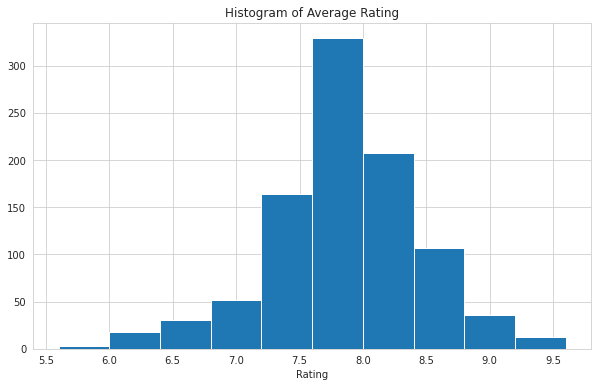

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.hist(op['Average Rating'])
plt.title('Histogram of Average Rating')
plt.xlabel("Rating")
plt.show()

The ratings vary from 5.5 to 9.6 range. Majaority of rating are above 7.5. Which is good sign that shows reception is positive.

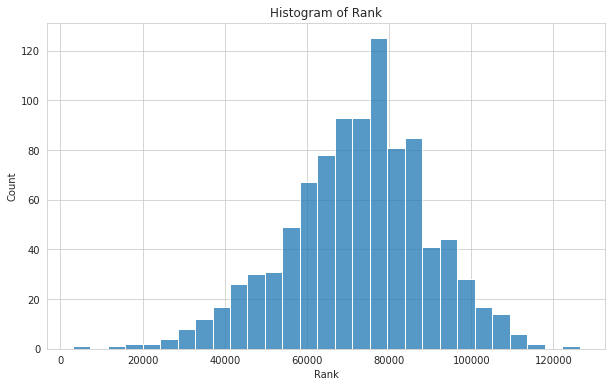

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(op.Rank)
plt.title('Histogram of Rank')
plt.xlabel("Rank")
plt.show()


The minimum rank is below 20000 and mximum above 120000. The majority of rank for episode is above 60000. 

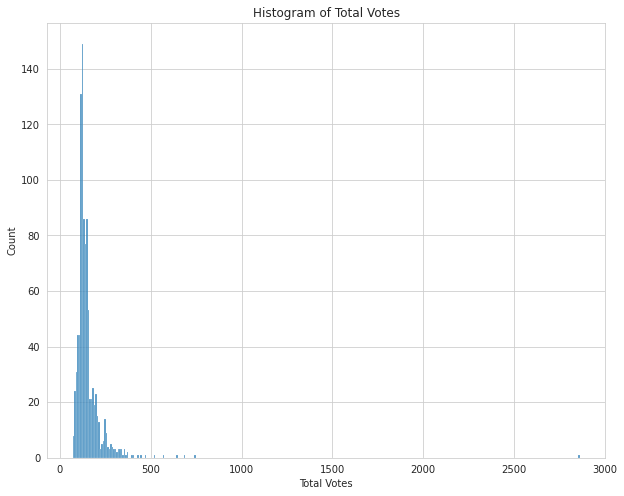

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(op['Total Votes'])
plt.title('Histogram of Total Votes')
plt.xlabel("Total Votes")
plt.show()


The mostly votes recieved are below 1000. 

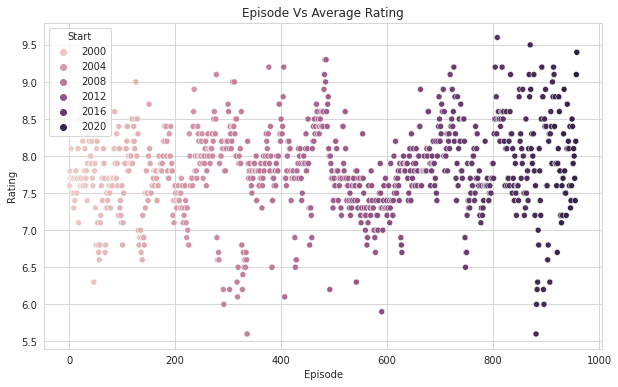

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=op, x='Episode', y='Average Rating',hue='Start')
plt.title('Episode Vs Average Rating')
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.show()

Ratings over episodes are stable. Maximum data is over 7 rating.

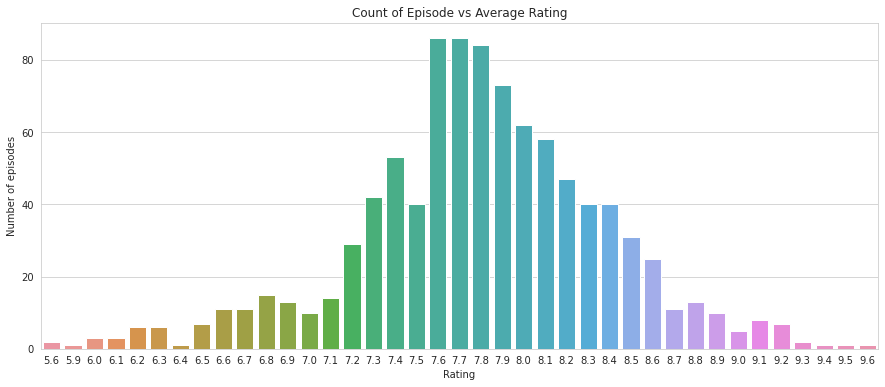

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=op['Average Rating'].astype('str').sort_values())
plt.title('Count of Episode vs Average Rating')
plt.xlabel("Rating")
plt.ylabel("Number of episodes")
plt.show()


In this plot we can see 7.6 and 7.7 is most occured rating with count over 80 episodes. Minimum rating is 5.6 and maximum is 9.6.

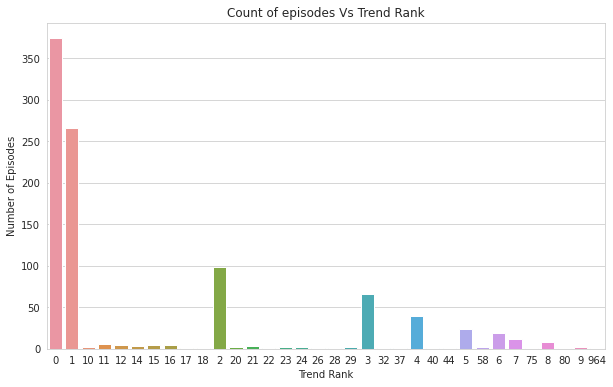

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=op['Trend'].astype('str').sort_values())
plt.title('Count of episodes Vs Trend Rank')
plt.xlabel("Trend Rank")
plt.ylabel("Number of Episodes")
plt.show()


Ove 250 episodes have reached number 1 trending spot and for over 350 episode we have no data.

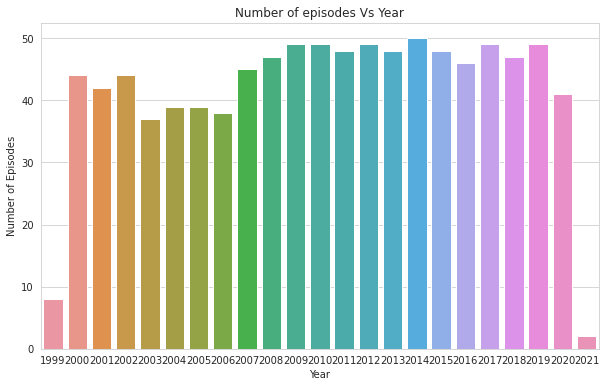

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=op['Start'].astype('str').sort_values())
plt.title('Number of episodes Vs Year')
plt.xlabel("Year")
plt.ylabel("Number of Episodes")
plt.show()


We can see that yearly above 35 episode are released and in 2014 One Piece realesed 50 episode. Episode count in 1999 and 2021 is less than 10.

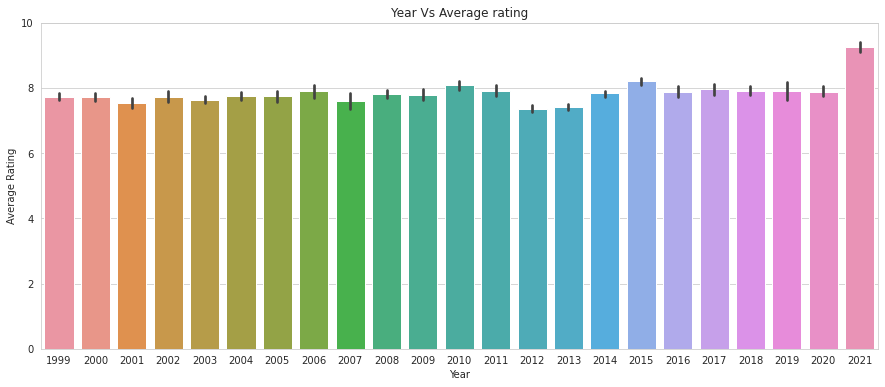

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=op, x='Start', y='Average Rating')
plt.ylim(top=10)
plt.title('Year Vs Average rating')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


In year wise avarage rating we can see that overall value is stayed constant and 2021 year shown a good jump in rating. But number episode are very less to conclude if people are liking it more in 2021.

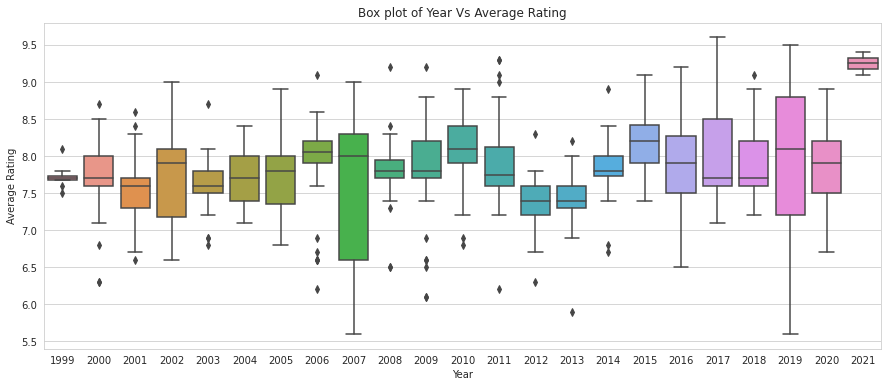

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=op, x='Start', y='Average Rating')
plt.title('Box plot of Year Vs Average Rating')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


The boxplot analysis over release year confirms our previous observations. Year 2007 and 2019 shows large range of values  than othe years.

Conclusions:

1)Dataset contains data for 958 episode released for time frame of 1999-2021.
2)Average ratings are above 7.5.
3)Average votes recieved are below 1000 per episode.
4) 266 episode have trended at number 1.
5)One Piece maintains very good rating over all episode and over the years it reamins constant.